# Machine Learning Final Project - Andrew Ebert

## Install and import packages

In [1]:
# Install dependencies
!pip install shap

In [2]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import shap 
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, precision_score, recall_score, accuracy_score, \
                            f1_score, precision_recall_curve, PrecisionRecallDisplay, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder, PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge, Lasso, LogisticRegression, LinearRegression

# Stage 1: Linear Models

## Regression Dataset (housing)

### Load, process, and adjust data

In [3]:
# Load dataset

housing_data = pd.read_csv('housing.csv')

display(housing_data)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [4]:
# Display columns with missing values

print(housing_data.isna().sum())

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


In [5]:
# Analyze categorical, numeric

housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
# Convert categorical variables to numeric (ocean_proximity)

unique_categories = housing_data['ocean_proximity'].unique()

encoder = LabelEncoder()

encoded_categories = encoder.fit_transform(unique_categories)

housing_data['ocean_proximity'] = encoder.fit_transform(housing_data['ocean_proximity'])

In [7]:
# Initialize features and target

input_features = ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms',
                 'population', 'households', 'median_income', 'ocean_proximity']

target = 'median_house_value'

### Train and test and evaluate (removing rows with total_bedrooms == na)

In [8]:
'''
Train_test split features/target
First implementation is removing rows with total_bedrooms == na
'''

housing_data_na_removed = housing_data.dropna()

X_train_lin_reg1, X_test_lin_reg1, y_train_lin_reg1, y_test_lin_reg1 = \
train_test_split(housing_data_na_removed[input_features], housing_data_na_removed[target],
test_size=0.25,
random_state=5)

In [9]:
# Evaluate model performance

model1 = LinearRegression()
model1.fit(X_train_lin_reg1, y_train_lin_reg1)
y1_pred = model1.predict(X_test_lin_reg1)

print(f'Metrics for case 1')
print(f'R2 score: {r2_score(y_test_lin_reg1, y1_pred)}')
print(f'Mean squared error: {mean_squared_error(y_test_lin_reg1, y1_pred)}')

Metrics for case 1
R2 score: 0.637347156171301
Mean squared error: 4899566134.67634


### Train and test and evaluate (setting rows with total_bedrooms == na to average total_bedrooms)

In [10]:
'''
Train_test split features/target
Second is filling in rows with total_bedrooms == na with average total_bedrooms
'''

housing_data_bedrooms_mean = housing_data.copy()

total_bedrooms_mean = housing_data['total_bedrooms'].mean()

housing_data_bedrooms_mean['total_bedrooms'] = \
    housing_data_bedrooms_mean['total_bedrooms'].fillna(total_bedrooms_mean)

X_train_lin_reg2, X_test_lin_reg2, y_train_lin_reg2, y_test_lin_reg2 = \
train_test_split(housing_data_bedrooms_mean[input_features], housing_data_bedrooms_mean[target],
test_size=0.25,
random_state=5)

In [11]:
# Evaluate model performance

model2 = LinearRegression()
model2.fit(X_train_lin_reg2, y_train_lin_reg2)
y2_pred = model2.predict(X_test_lin_reg2)

print(f'Metrics for case 2')
print(f'R2 score: {r2_score(y_test_lin_reg2, y2_pred)}')
print(f'Mean squared error: {mean_squared_error(y_test_lin_reg2, y2_pred)}')

Metrics for case 2
R2 score: 0.6411224481450131
Mean squared error: 4912792828.522451


### Train and test and evaluate (setting rows with total_bedrooms == na to average of (total_rooms / total_bedrooms) * row's total_rooms: essentially gets proportional total_bedrooms based on total_rooms)

In [12]:
'''
Train_test split features/target
Third implentation is filling in rows with total_bedrooms == na with 
total_rooms * (avg(total_rooms / total_bedrooms))
'''

housing_data_bedrooms_proportionally = housing_data.copy()

total_rooms_sum = housing_data.loc[housing_data['total_bedrooms'].notna(), 'total_rooms'].sum()

total_bedrooms_sum = housing_data['total_bedrooms'].sum()

proportion = total_bedrooms_sum / total_rooms_sum

housing_data_bedrooms_proportionally['total_bedrooms'] = housing_data_bedrooms_proportionally.apply(
    lambda row: row['total_rooms'] * proportion if pd.isna(row['total_bedrooms']) else row['total_bedrooms'], axis=1
)

X_train_lin_reg3, X_test_lin_reg3, y_train_lin_reg3, y_test_lin_reg3 = \
train_test_split(housing_data_bedrooms_proportionally[input_features], housing_data_bedrooms_proportionally[target],
test_size=0.25,
random_state=5)

In [13]:
# Evaluate model performance

model3 = LinearRegression()
model3.fit(X_train_lin_reg3, y_train_lin_reg3)
y3_pred = model3.predict(X_test_lin_reg3)

print(f'Metrics for case 3')
print(f'R2 score: {r2_score(y_test_lin_reg3, y3_pred)}')
print(f'Mean squared error: {mean_squared_error(y_test_lin_reg3, y3_pred)}')

Metrics for case 3
R2 score: 0.6428052957492465
Mean squared error: 4889755774.243518


The best accuracy came from model 3, so we will proceed with this model.

### Fit model 3 without each feature (manually determine features improving/hurting model performance)

In [14]:
# Train/test models

for feature in input_features:

    X_train = X_train_lin_reg3.drop(columns=feature)
    X_test = X_test_lin_reg3.drop(columns=feature)

    model = LinearRegression()
    model.fit(X_train, y_train_lin_reg3)
    y_pred = model.predict(X_test)

    print(f'Metrics without feature {feature}')
    print(f'R2 score: {r2_score(y_test_lin_reg3, y_pred)}')
    print(f'Mean squared error: {mean_squared_error(y_test_lin_reg3, y_pred)}')
    print('\n')

Metrics without feature longitude
R2 score: 0.5833330977078929
Mean squared error: 5703890251.375956


Metrics without feature latitude
R2 score: 0.574739790790735
Mean squared error: 5821526855.776792


Metrics without feature housing_median_age
R2 score: 0.6283099581562898
Mean squared error: 5088187217.518813


Metrics without feature total_rooms
R2 score: 0.6420054570705138
Mean squared error: 4900705028.953215


Metrics without feature total_bedrooms
R2 score: 0.6376969560490189
Mean squared error: 4959685516.338604


Metrics without feature population
R2 score: 0.6216402146513886
Mean squared error: 5179491529.782409


Metrics without feature households
R2 score: 0.643256105458396
Mean squared error: 4883584491.8808


Metrics without feature median_income
R2 score: 0.38865722647610657
Mean squared error: 8368872274.15886


Metrics without feature ocean_proximity
R2 score: 0.6429683580443621
Mean squared error: 4887523560.860692




### Fit model 3 without features that have better accuracy when removed

In [15]:
# Train/test model

features = ['households', 'ocean_proximity']

X_train = X_train_lin_reg3.drop(columns=features)
X_test = X_test_lin_reg3.drop(columns=features)

model = LinearRegression()
model.fit(X_train, y_train_lin_reg3)
y_pred = model.predict(X_test)

print(f'Metrics without features {features}')
print(f'R2 score: {r2_score(y_test_lin_reg3, y_pred)}')
print(f'Mean squared error: {mean_squared_error(y_test_lin_reg3, y_pred)}')

Metrics without features ['households', 'ocean_proximity']
R2 score: 0.6433934009267874
Mean squared error: 4881705009.062732


Interestingly enough the models of case 3, where we take the average proportion of total rooms to total bedrooms and multiply by total rooms -- in order to fill in missing data -- had R^2 scores closest to 1. Also, when we remove the features 'households' and 'ocean_proximity' we get the highest model accuracy yet. We'll finally implement a preprocessing technique the model we just noticed, to see if we notice any improvement, and we'll use regularization and polynomial features for both improvement and verification, respectively.

### Implement pipeline, experimenting with preprocessing (StandardScaler) and polynomial features

In [16]:
# Implement model 3 with pipeline for preprocessing and polynomial features

best_degree = 1
best_score = -np.inf

for degrees in range(1, 6):
    pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(degree = degrees)),
    ('lin_reg', LinearRegression())
])

    pipeline.fit(X_train, y_train_lin_reg3)
    
    y_pred = pipeline.predict(X_test)

    cv_scores = cross_val_score(pipeline, X_train, y_train_lin_reg3, cv=5, scoring='r2')

    avg_cv = np.mean(cv_scores)


    if avg_cv > best_score:
        best_score = avg_cv
        best_degree = degrees

    print(f'Metrics for degree {degrees}')
    print(f'R2 score: {r2_score(y_test_lin_reg3, y_pred)}')
    print(f'Mean squared error: {mean_squared_error(y_test_lin_reg3, y_pred)}')
    print(f'Average CV score: {avg_cv}')
    print('\n')

print(f'Best degree: {best_degree}')

Metrics for degree 1
R2 score: 0.6433934009267889
Mean squared error: 4881705009.062711
Average CV score: 0.6314071527498857


Metrics for degree 2
R2 score: 0.6976254071570194
Mean squared error: 4139305240.932554
Average CV score: 0.5324911860482157


Metrics for degree 3
R2 score: 0.4438173816486717
Mean squared error: 7613766769.924191
Average CV score: -2.2372457144659004


Metrics for degree 4
R2 score: -15.853715343744796
Mean squared error: 230716051886.59186
Average CV score: -714.1427405624086


Metrics for degree 5
R2 score: -5119.628556382942
Mean squared error: 70097968288332.83
Average CV score: -64638.60896179559


Best degree: 1


While degree 2 has a better R2 score than degree 1, it has a lower CV score which indicates the model for degree 2 is overfitting, and thus degree 1 is an overall better model still.

### Regularization using Ridge and Lasso

In [17]:
# Almost identical to the cell above except we are implementing Ridge vs LinearRegression

pipeline = Pipeline([
('scaler', StandardScaler()),
('poly', PolynomialFeatures(degree = 1)),
('ridge', Ridge(alpha=1.0))
])

pipeline.fit(X_train, y_train_lin_reg3)
    
y_pred = pipeline.predict(X_test)

cv_scores = cross_val_score(pipeline, X_train, y_train_lin_reg3, cv=5, scoring='r2')

avg_cv = np.mean(cv_scores)


print(f'Metrics for degree 1')
print(f'R2 score: {r2_score(y_test_lin_reg3, y_pred)}')
print(f'Mean squared error: {mean_squared_error(y_test_lin_reg3, y_pred)}')
print(f'Average CV score: {avg_cv}')

Metrics for degree 1
R2 score: 0.6433939424865335
Mean squared error: 4881697595.473269
Average CV score: 0.631409911686484


In [18]:
# Almost identical to the cell above except we are implementing Lasso vs LinearRegression

pipeline = Pipeline([
('scaler', StandardScaler()),
('poly', PolynomialFeatures(degree = 1)),
('lasso', Lasso(alpha=0.01, max_iter=10000))
])

pipeline.fit(X_train, y_train_lin_reg3)
    
y_pred = pipeline.predict(X_test)

cv_scores = cross_val_score(pipeline, X_train, y_train_lin_reg3, cv=5, scoring='r2')

avg_cv = np.mean(cv_scores)

print(f'Metrics for degree 1')
print(f'R2 score: {r2_score(y_test_lin_reg3, y_pred)}')
print(f'Mean squared error: {mean_squared_error(y_test_lin_reg3, y_pred)}')
print(f'Average CV score: {avg_cv}')

Metrics for degree 1
R2 score: 0.6433934021052949
Mean squared error: 4881704992.929754
Average CV score: 0.6314071573182629


Not much difference is observed when implementing and experimenting with regularization techniques.

## Classification Dataset (loan)

### Load, process, and adjust data

In [19]:
# Load dataset

loan_data = pd.read_csv('loan.csv')

display(loan_data)

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,male,Associate,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3.0,645,No,1
44996,37.0,female,Associate,65800.0,17,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,11.0,621,No,1
44997,33.0,male,Associate,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10.0,668,No,1
44998,29.0,male,Bachelor,33164.0,4,RENT,12000.0,EDUCATION,13.23,0.36,6.0,604,No,1


In [20]:
# Display columns with missing values

print(loan_data.isna().sum())

person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64


In [21]:
# Analyze numeric, categorical

loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [22]:
# Visualize unique identifiers for categorical

categorical = {'person_gender':[], 'person_education':[], 'person_home_ownership':[], 
               'loan_intent':[], 'previous_loan_defaults_on_file':[]}


for _, row in loan_data.iterrows():  
    for column_name in categorical.keys():
        value = row[column_name]
        if value not in categorical[column_name]:
            categorical[column_name].append(value)

# Print results
for key, value in categorical.items():
    print(f'Key: {key}, values: {value}')

Key: person_gender, values: ['female', 'male']
Key: person_education, values: ['Master', 'High School', 'Bachelor', 'Associate', 'Doctorate']
Key: person_home_ownership, values: ['RENT', 'OWN', 'MORTGAGE', 'OTHER']
Key: loan_intent, values: ['PERSONAL', 'EDUCATION', 'MEDICAL', 'VENTURE', 'HOMEIMPROVEMENT', 'DEBTCONSOLIDATION']
Key: previous_loan_defaults_on_file, values: ['No', 'Yes']


In [23]:
# Convert categorical to numeric

loan_data['person_gender'].replace(['female', 'male'],
                        [0, 1], inplace=True)
loan_data['person_education'].replace(['Master', 'High School', 'Bachelor', 'Associate', 'Doctorate'],
                        [0, 1, 2, 3, 4], inplace=True)
loan_data['person_home_ownership'].replace(['RENT', 'OWN', 'MORTGAGE', 'OTHER'],
                        [0, 1, 2, 3], inplace=True)
loan_data['loan_intent'].replace(['PERSONAL', 'EDUCATION', 'MEDICAL', 'VENTURE', 'HOMEIMPROVEMENT', 'DEBTCONSOLIDATION'],
                        [0, 1, 2, 3, 4, 5], inplace=True)
loan_data['previous_loan_defaults_on_file'].replace(['No', 'Yes'],
                        [0, 1], inplace=True)

display(loan_data)

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,0,0,71948.0,0,0,35000.0,0,16.02,0.49,3.0,561,0,1
1,21.0,0,1,12282.0,0,1,1000.0,1,11.14,0.08,2.0,504,1,0
2,25.0,0,1,12438.0,3,2,5500.0,2,12.87,0.44,3.0,635,0,1
3,23.0,0,2,79753.0,0,0,35000.0,2,15.23,0.44,2.0,675,0,1
4,24.0,1,0,66135.0,1,0,35000.0,2,14.27,0.53,4.0,586,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,1,3,47971.0,6,0,15000.0,2,15.66,0.31,3.0,645,0,1
44996,37.0,0,3,65800.0,17,0,9000.0,4,14.07,0.14,11.0,621,0,1
44997,33.0,1,3,56942.0,7,0,2771.0,5,10.02,0.05,10.0,668,0,1
44998,29.0,1,2,33164.0,4,0,12000.0,1,13.23,0.36,6.0,604,0,1


In [24]:
# Initialize features and target

input_features = ['person_age', 'person_gender', 'person_education', 'person_income', 'person_emp_exp',
                 'person_home_ownership', 'loan_amnt', 'loan_intent', 'loan_int_rate', 'loan_percent_income',
                 'cb_person_cred_hist_length', 'credit_score', 'previous_loan_defaults_on_file']

target = 'loan_status'

### Train, test, and evaluate

In [25]:
# Train/test split

X_train, X_test, y_train, y_test = \
train_test_split(loan_data[input_features], loan_data[target],
test_size=0.25,
random_state=5)

In [26]:
# LogisticRegression Model

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

slope = model.coef_[0]
intercept = model.intercept_

print(f"Slope (w): {slope}")
print(f"Intercept (w_0): {intercept}")

Slope (w): [-2.66951858e-01 -1.03909859e-02 -4.30134987e-02 -2.44114026e-05
  2.12017890e-01 -4.58061680e-01  1.08248959e-04  3.09643036e-01
  3.21707641e-01  3.01695590e-02  8.84405770e-02  2.03137450e-03
 -9.10629543e-01]
Intercept (w_0): [-0.02418515]


In [27]:
# Evaluate model performance

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

Accuracy: 0.8451


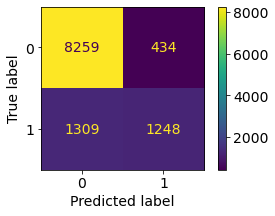

In [28]:
# Plot confusion matrix

plt.rcParams.update({'font.size': 14, "figure.figsize": (5,3)})

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

plt.show()

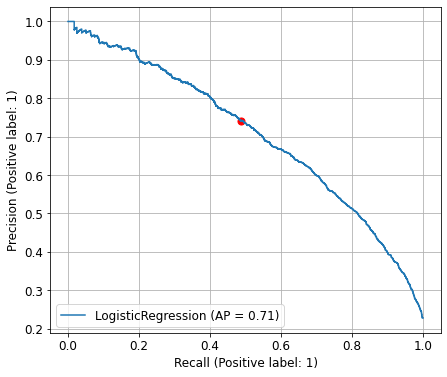

In [29]:
# Plot precision/recall

plt.rcParams.update({'font.size': 12, "figure.figsize": (7,6)})

PrecisionRecallDisplay.from_estimator(model, X_test, y_test)

plt.scatter(recall_score(y_test, y_pred), precision_score(y_test, y_pred), c = 'r', s=50)

plt.grid()

plt.show()

In the context of this problem, it is better for somebody to be disapproved when they aren't qualified than to be approved when they aren't qualified. With this said, we will later adjust the precision/recall threshold in order to have a more proportional false positive rate for both classes 0 and 1.

### Fit model without each feature

In [30]:
# Get model accuracy removing each feature at a time

for feature in input_features:

    X_train_subset = X_train.drop(columns=feature)
    X_test_subset = X_test.drop(columns=feature)

    model = LogisticRegression(max_iter=1000)
    model.fit(X_train_subset, y_train)
    y_pred = model.predict(X_test_subset)
    
    accuracy = accuracy_score(y_test, y_pred)

    print(f'Metrics without feature {feature}')
    print(f'Accuracy: {accuracy:.4f}')

Metrics without feature person_age
Accuracy: 0.8199
Metrics without feature person_gender
Accuracy: 0.8451
Metrics without feature person_education
Accuracy: 0.8451
Metrics without feature person_income
Accuracy: 0.8683
Metrics without feature person_emp_exp
Accuracy: 0.8196
Metrics without feature person_home_ownership
Accuracy: 0.8180
Metrics without feature loan_amnt
Accuracy: 0.8018
Metrics without feature loan_intent
Accuracy: 0.8188
Metrics without feature loan_int_rate
Accuracy: 0.8497
Metrics without feature loan_percent_income
Accuracy: 0.8729
Metrics without feature cb_person_cred_hist_length
Accuracy: 0.8195
Metrics without feature credit_score
Accuracy: 0.8226
Metrics without feature previous_loan_defaults_on_file
Accuracy: 0.8156


### Train, test, and evaluate with adjustments for optimal accuracy

In [55]:
# Adjust recall threshold

X_train, X_test, y_train, y_test = \
train_test_split(loan_data[input_features], loan_data[target],
test_size=0.25,
random_state=5)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_prob = model.predict_proba(X_test)[:, 1]

precision, recall, thresholds = precision_recall_curve(y_test, y_prob)

idx = np.argmin(np.abs(recall - 0.51))
optimal_threshold = thresholds[idx]

print(f"Optimal threshold for recall ≈ 0.6: {optimal_threshold}")

y_pred_new = (y_prob > optimal_threshold).astype(int)

Optimal threshold for recall ≈ 0.6: 0.4810606571511901


In [56]:
# Evaluate new pred performance

accuracy = accuracy_score(y_test, y_pred_new)
print(f'Accuracy: {accuracy:.4f}')

Accuracy: 0.8456


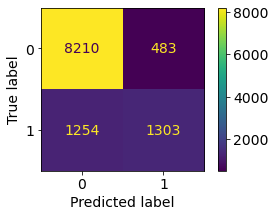

In [57]:
# Plot confusion matrix

plt.rcParams.update({'font.size': 14, "figure.figsize": (5,3)})

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_new)

plt.show()

### Train, test, and evaluate with adjustments for improved proportional accuracy

In [ ]:
'''
Finetuning to have better accuracy proportional to classes 
(limit class 0 dominating due to frequency)
Make custom predictions based on custom threshold
(determined through trial and error)
'''

precision, recall, thresholds = precision_recall_curve(y_test, y_prob)
optimal_threshold = 0.25
y_pred_new = (y_prob > optimal_threshold).astype(int)

accuracy = accuracy_score(y_test, y_pred_new)
print(f'Accuracy: {accuracy:.4f}')

# Plot confusion matrix
plt.rcParams.update({'font.size': 14, "figure.figsize": (5,3)})
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_new)
plt.show()

# Plot Precision/Recall vs Threshold
plt.rcParams.update({'font.size': 12, "figure.figsize": (7,6)})
plt.figure(figsize=(8, 6))
plt.plot(thresholds, precision[:-1], label='Precision', color='blue')
plt.plot(thresholds, recall[:-1], label='Recall', color='green')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision and Recall vs. Threshold')
plt.legend()
plt.grid(True)
plt.show()

### Train, test, and evaluate code above removing features that improved accuracy when removed (from above)

In [ ]:
'''
Remove features: person_income, loan_int_rate, loan_percent_income
Finetuning to have better accuracy proportional to classes 
(limit class 0 dominating due to frequency)
Make custom predictions based on custom threshold
(determined through trial and error)
'''

features = ['person_income', 'loan_int_rate', 'loan_percent_income']

X_train_subset = X_train.drop(columns=features)
X_test_subset = X_test.drop(columns=features)

model = LogisticRegression(max_iter=1000)
model.fit(X_train_subset, y_train)
y_prob = model.predict_proba(X_test_subset)[:, 1]

precision, recall, thresholds = precision_recall_curve(y_test, y_prob)
optimal_threshold = 0.35
y_pred_new = (y_prob > optimal_threshold).astype(int)

accuracy = accuracy_score(y_test, y_pred_new)
print(f'Accuracy: {accuracy:.4f}')

# Plot confusion matrix
plt.rcParams.update({'font.size': 14, "figure.figsize": (5,3)})
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_new)
plt.show()

# Plot Precision/Recall vs Threshold
plt.rcParams.update({'font.size': 12, "figure.figsize": (7,6)})
plt.figure(figsize=(8, 6))
plt.plot(thresholds, precision[:-1], label='Precision', color='blue')
plt.plot(thresholds, recall[:-1], label='Recall', color='green')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision and Recall vs. Threshold')
plt.legend()
plt.grid(True)
plt.show()

# Stage 2: Feature Contribution Analysis with SHAP

In [ ]:
# Evaluate Feature Contribution with SHAP on Lin Reg Case 3 
# (best observed model)

input_features = ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms',
                 'population', 'households', 'median_income', 'ocean_proximity']

target = 'median_house_value'

# Split, scale
X_train, X_test, y_train, y_test = \
train_test_split(housing_data_bedrooms_proportionally[input_features], housing_data_bedrooms_proportionally[target],
test_size=0.25,
random_state=5)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

clf = LogisticRegression(class_weight="balanced", max_iter=10000)
clf.fit(X_train_scaled, y_train)

# Use SHAP for explanations
explainer = shap.LinearExplainer(clf, X_train_scaled)
shap_values = explainer.shap_values(X_test_scaled)

# Group to remove issues with large data not plotting
shap_values_aggregated = shap_values.mean(axis=2)
    
# Plot
shap.summary_plot(shap_values_aggregated, X_test, plot_type="bar")

In [ ]:
# Evaluate Feature Contribution with SHAP on Log Reg highest accuracy 
# (best observed model with accuracy)

input_features = ['person_age', 'person_gender', 'person_education', 'person_income', 'person_emp_exp',
                 'person_home_ownership', 'loan_amnt', 'loan_intent', 'loan_int_rate', 'loan_percent_income',
                 'cb_person_cred_hist_length', 'credit_score', 'previous_loan_defaults_on_file']

target = 'loan_status'

# Split, scale
X_train, X_test, y_train, y_test = \
train_test_split(loan_data[input_features], loan_data[target],
test_size=0.25,
random_state=5)

clf = LogisticRegression(max_iter=10000)  
clf.fit(X_train, y_train)

# Use SHAP for explanations
explainer = shap.Explainer(clf, X_train)
shap_values = explainer(X_test)

# Plot
shap.summary_plot(shap_values, X_test, plot_type="bar")